In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [3]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [4]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7544 entries, 0 to 7543
Data columns (total 16 columns):
business_id             7544 non-null int64
name                    7542 non-null object
address                 7544 non-null object
city                    5778 non-null object
postal_code             7248 non-null object
latitude                4622 non-null float64
longitude               4622 non-null float64
phone_number            2173 non-null object
TaxCode                 7536 non-null object
business_certificate    6325 non-null float64
application_date        5635 non-null object
owner_name              7536 non-null object
owner_address           7522 non-null object
owner_city              7506 non-null object
owner_state             7507 non-null object
owner_zip               7480 non-null object
dtypes: float64(3), int64(1), object(12)
memory usage: 943.1+ KB


In [5]:
businesses[businesses.postal_code.isnull()]

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
2398,8202,Xiao Loong,250 WEST PORTAL AVENUE,NaN,NaN,37.738616,-122.468775,+14155272647,H25,374722.0,NaN,\tXIAO LOONG INC,250 WEST PORTAL AVE,SAN FRANCISCO,CA,94127
2419,9281,Walgreen's,199 Parnassus Ave,NaN,NaN,37.764444,-122.452515,NaN,H04,NaN,05/29/2003,Walgreens,P.O.Box 901,Deerfield,IL,60015
2426,9328,Boos Voni Tortas,5170 Mission St,NaN,NaN,37.716163,-122.441438,+14155580127,H24,370790.0,10/01/2003,Angela Miranda,5170 Mission St.,S.F.,CA,94112
2428,9358,Edgewood Children's Center,1801 Vicente St,NaN,NaN,37.739083,-122.485437,NaN,H91,913733.0,NaN,Edgewood Day Treatment,1801 Vicente Street,SF,CA,94116
2439,9582,Dimples,1700 Post St.,NaN,NaN,37.785632,-122.429794,NaN,H87,920751.0,NaN,"CROUERE, SONYONG Y.",266 JUANITA WAY,SF,CA,94127
2442,9627,Home Sausage Company,1726 mission st.,NaN,NaN,37.769646,-122.420197,NaN,H03,NaN,NaN,Home Sausage Co.,1726 mission st.,NaN,NaN,NaN
2460,10011,Osha Thai Noodle,819 Valencia St.,NaN,NaN,37.759943,-122.421332,+14155319293,H25,NaN,NaN,Wassana Inc.,819 Valencia St.,S.F.,CA,94110
2463,10065,Tacos El Primo Catering Truck,2225 Jennings St,San Francisco,NaN,37.726230,-122.389335,+14155844975,H79,NaN,NaN,Teodoro Hernandez,1407 Revere Street,San Francisco,CA,94124
2469,10129,Man Hang Catering,2041 18th Ave,SO.S.F.,NaN,NaN,NaN,NaN,H79,NaN,NaN,"Chan, Fu",1686 36th Avenue,San Francisco,CA,94122
2476,10227,The Napper Tandy,3200 24th St,NaN,NaN,37.752581,-122.416482,NaN,H25,396103.0,02/02/2004,P.F.M. Enterprises,3200 24th Street,SF,CA,94110


In [6]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [7]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27285 entries, 0 to 27284
Data columns (total 4 columns):
business_id    27285 non-null int64
Score          15263 non-null float64
date           27285 non-null int64
type           27285 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 852.7+ KB


In [8]:
inspections[inspections.Score.isnull()].head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
2,10,NaN,20140124,Reinspection/Followup
14,45,NaN,20151230,Non-inspection site visit
19,50,NaN,20150513,Non-inspection site visit
22,50,NaN,20130409,Reinspection/Followup


In [9]:
inspections.isnull().sum()

business_id        0
Score          12022
date               0
type               0
dtype: int64

In [10]:
inspections[inspections.business_id == 19]

,business_id,Score,date,type
4,19,94.0,20141110,Routine - Unscheduled
5,19,94.0,20140214,Routine - Unscheduled
6,19,96.0,20130904,Routine - Unscheduled


In [11]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)

In [12]:
violations[violations.business_id == 19]

,business_id,date,ViolationTypeID,risk_category,description
5,19,20140214,103156,Low Risk,Permit license or inspection report not posted
6,19,20140214,103124,Moderate Risk,Inadequately cleaned or sanitized food contact...
7,19,20141110,103145,Low Risk,Improper storage of equipment utensils or linens
8,19,20141110,103116,Moderate Risk,Inadequate food safety knowledge or lack of ce...
9,19,20130904,103133,Moderate Risk,Foods not protected from contamination


In [13]:
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39720 entries, 0 to 39719
Data columns (total 5 columns):
business_id        39720 non-null int64
date               39720 non-null int64
ViolationTypeID    39720 non-null int64
risk_category      39710 non-null object
description        39710 non-null object
dtypes: int64(3), object(2)
memory usage: 1.5+ MB


In [14]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

In [40]:
inspections_violations = pd.merge(inspections, violations, on=['business_id','date'])
inspections_violations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43850 entries, 0 to 43849
Data columns (total 8 columns):
business_id        43850 non-null int64
Score              38656 non-null float64
date               43850 non-null int64
type               43850 non-null object
month              43850 non-null object
ViolationTypeID    43850 non-null int64
risk_category      43838 non-null object
description        43838 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 3.0+ MB


In [43]:
restaurant_scores = pd.merge(businesses, inspections_violations, how = 'right', on='business_id')

In [44]:
restaurant_scores.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_city,owner_state,owner_zip,Score,date,type,month,ViolationTypeID,risk_category,description
0,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,94.0,20140729,Routine - Unscheduled,07,103129,Moderate Risk,Insufficient hot water or running water
1,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,94.0,20140729,Routine - Unscheduled,07,103144,Low Risk,Unapproved or unmaintained equipment or utensils
2,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,92.0,20140114,Routine - Unscheduled,01,103154,Low Risk,Unclean or degraded floors walls or ceilings
3,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,92.0,20140114,Routine - Unscheduled,01,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
4,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,92.0,20140114,Routine - Unscheduled,01,103145,Low Risk,Improper storage of equipment utensils or linens


In [45]:
restaurant_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43914 entries, 0 to 43913
Data columns (total 23 columns):
business_id             43914 non-null float64
name                    43753 non-null object
address                 43753 non-null object
city                    37838 non-null object
postal_code             42798 non-null object
latitude                33424 non-null float64
longitude               33424 non-null float64
phone_number            12080 non-null object
TaxCode                 43753 non-null object
business_certificate    38880 non-null float64
application_date        32177 non-null object
owner_name              43666 non-null object
owner_address           43621 non-null object
owner_city              43568 non-null object
owner_state             43561 non-null object
owner_zip               43463 non-null object
Score                   38715 non-null float64
date                    43914 non-null int64
type                    43914 non-null object
month        

In [19]:
# 2 Which ten business have had the most inspections?

In [20]:
inspection_businesses = pd.merge(inspections, businesses, how = 'left', on='business_id')

In [23]:
inspection_businesses.groupby('name').type.count().sort_values(ascending = False).head(10)

name
Peet's Coffee & Tea           87
Starbucks Coffee              71
Whole Foods Market            54
STARBUCKS                     49
Specialty's Cafe & Bakery     48
San Francisco Soup Company    44
STARBUCKS COFFEE              44
KENTUCKY FRIED CHICKEN        32
Lee's Deli                    31
Subway Sandwiches             31
Name: type, dtype: int64

In [31]:
# 3 Group and count the inspections by type

In [24]:
inspection_businesses.groupby('type').type.count()

type
Administrative or Document Review        4
Complaint                             1637
Complaint Reinspection/Followup        163
Foodborne Illness Investigation        102
Multi-agency Investigation               2
New Construction                      1615
New Ownership                         1878
Non-inspection site visit              841
Reinspection/Followup                 5393
Routine - Scheduled                     63
Routine - Unscheduled                15519
Special Event                            2
Structural Inspection                  123
Name: type, dtype: int64

In [33]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

In [25]:
inspections['month'] = inspections.date.apply(lambda x: str(x)[4:6])
inspections.head()

,business_id,Score,date,type,month
0,10,NaN,20140807,Reinspection/Followup,08
1,10,94.0,20140729,Routine - Unscheduled,07
2,10,NaN,20140124,Reinspection/Followup,01
3,10,92.0,20140114,Routine - Unscheduled,01
4,19,94.0,20141110,Routine - Unscheduled,11


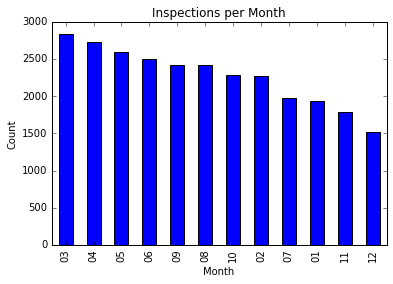

In [26]:
# drinks.continent.value_counts().plot(kind='bar', title='Countries per Continent')
# plt.xlabel('Continent')
# plt.ylabel('Count')
inspections.month.value_counts().plot(kind='bar', title = 'Inspections per Month')
plt.xlabel('Month')
plt.ylabel('Count')

In [36]:
# 5 Which zip code contains the most high risk violations?

In [27]:
violations__businesses = pd.merge(violations, businesses, how = 'left', on='business_id')

In [34]:
violations__businesses[violations__businesses.risk_category =='High Risk']\
.groupby('postal_code').risk_category.count().sort_values(ascending = False).head()

postal_code
94133    530
94110    501
94103    496
94109    396
94102    390
Name: risk_category, dtype: int64

In [16]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

In [41]:
# New Ownership
New_Ownership_count = float(inspections_violations[inspections_violations.type == 'New Ownership'].type.count())
inspections_violations[inspections_violations.type == 'New Ownership'].\
    groupby('risk_category').risk_category.apply(lambda x: x.count()/New_Ownership_count)

risk_category
High Risk        0.132143
Low Risk         0.493750
Moderate Risk    0.374107
Name: risk_category, dtype: float64

In [42]:
# No New Ownership
No_New_Ownership_count = float(inspections_violations[inspections_violations.type != 'New Ownership'].type.count())
inspections_violations[inspections_violations.type != 'New Ownership'].\
    groupby('risk_category').risk_category.apply(lambda x: x.count()/No_New_Ownership_count)

risk_category
High Risk        0.143576
Low Risk         0.519073
Moderate Risk    0.337070
Name: risk_category, dtype: float64

In [17]:
# 7 Examining the descriptions, what is the most common violation?

In [73]:
violations.groupby('description').description.count().sort_values(ascending=False).head()

description
Unclean or degraded floors walls or ceilings                          3395
Moderate risk food holding temperature                                2621
Inadequate and inaccessible handwashing facilities                    2444
Unapproved or unmaintained equipment or utensils                      2335
Wiping cloths not clean or properly stored or inadequate sanitizer    2294
Name: description, dtype: int64

In [18]:
# 8 Create a hist of the scores with 10 bins

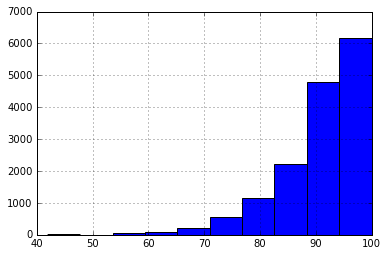

In [116]:
inspections.Score.hist(bins=10)

In [19]:
# 9 Can you predict risk category based on the other features in this dataset?

In [46]:
from sklearn.neighbors import KNeighborsClassifier 

In [20]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [21]:
############################
### A Little More Morbid ###
############################

In [119]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [125]:
killings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 15 columns):
Unnamed: 0       467 non-null int64
name             467 non-null object
age              467 non-null int64
gender           467 non-null object
race             467 non-null object
month            467 non-null object
day              467 non-null int64
year             467 non-null int64
streetaddress    463 non-null object
city             467 non-null object
state            467 non-null object
agency           467 non-null object
cause            467 non-null object
armed            467 non-null object
county_income    467 non-null int64
dtypes: int64(5), object(10)
memory usage: 54.8+ KB


In [23]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

In [120]:
killings = killings.rename(columns = {'lawenforcementagency': 'agency', 'raceethnicity': 'race'})

In [121]:
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [24]:
# 2. Show the count of missing values in each column

In [126]:
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [25]:
# 3. replace each null value in the dataframe with the string "Unknown"

In [129]:
killings.fillna(value = 'Unknown', inplace = True)

In [130]:
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [26]:
# 4. How many killings were there so far in 2015?

In [131]:
killings.year.value_counts()

2015    467
Name: year, dtype: int64

In [27]:
# 5. Of all killings, how many were male and how many female?

In [132]:
killings.groupby('gender').gender.count()

gender
Female     22
Male      445
Name: gender, dtype: int64

In [28]:
# 6. How many killings were of unarmed people?

In [133]:
killings.groupby('armed').armed.count()

armed
Disputed                2
Firearm               230
Knife                  68
No                    102
Non-lethal firearm     14
Other                  26
Unknown                 7
Vehicle                18
Name: armed, dtype: int64

In [29]:
# 7. What percentage of all killings were unarmed?

In [137]:
total_killings = float(killings.armed.count())
killings.groupby('armed').armed.apply(lambda x: x.count()/total_killings)

armed
Disputed              0.004283
Firearm               0.492505
Knife                 0.145610
No                    0.218415
Non-lethal firearm    0.029979
Other                 0.055675
Unknown               0.014989
Vehicle               0.038544
Name: armed, dtype: float64

In [30]:
# 8. What are the 5 states with the most killings?

In [280]:
killings.groupby('state').state.count().sort_values(ascending = False).head(5)

state
CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [31]:
# 9. Show a value counts of deaths for each race

In [140]:
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

In [32]:
# 10. Display a histogram of ages of all killings

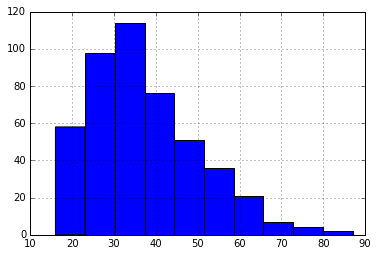

In [142]:
killings.age.hist(bins = 10)

In [33]:
# 11. Show 6 histograms of ages by race

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F108438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010405FD0>]], dtype=object)

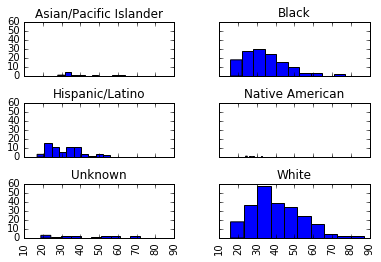

In [157]:
killings.age.hist(by = killings.race, sharex=True, sharey=True)

In [34]:
# 12. What is the average age of death by race?

In [160]:
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

In [35]:
# 13. Show a bar chart with counts of deaths every month

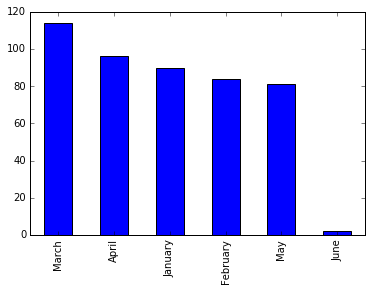

In [164]:
killings.month.value_counts().plot(kind = 'bar')

In [36]:
###################
### Less Morbid ###
###################

In [182]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [38]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

In [183]:
majors = majors.drop(['Employed_full_time_year_round', 'Major_code'], axis = 1)

In [184]:
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


In [39]:
# 2. Show the cout of missing values in each column

In [185]:
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [40]:
# 3. What are the top 10 highest paying majors?

In [229]:
majors[['Major', 'Median']].sort_values(by = 'Median', ascending = False).head(10)
# majors.groupby('Major').Median.max().sort_values(ascending = False).head(10)

,Major,Median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000
56,MINING AND MINERAL ENGINEERING,92000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
48,ELECTRICAL ENGINEERING,88000
45,CHEMICAL ENGINEERING,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


In [41]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

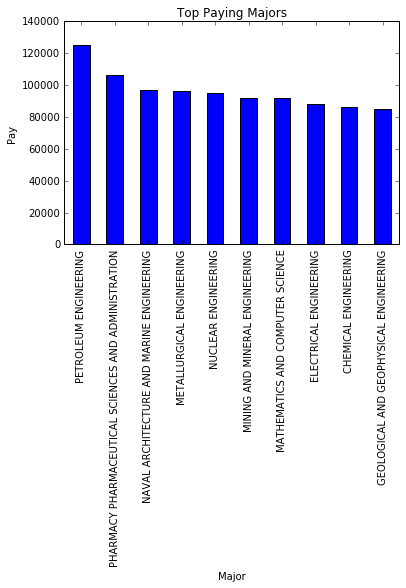

In [230]:
majors.groupby('Major').Median.max().sort_values(ascending = False).head(10).plot(kind = 'bar', title = 'Top Paying Majors')
plt.xlabel('Major')
plt.ylabel('Pay')

In [42]:
# 5. What is the average median salary for each major category?

In [234]:
majors.groupby('Major_category').Median.median().sort_values(ascending= False)

Major_category
Engineering                            75000
Computers & Mathematics                66000
Physical Sciences                      60000
Business                               60000
Agriculture & Natural Resources        53000
Social Science                         52000
Biology & Life Science                 51500
Law & Public Policy                    50000
Health                                 50000
Communications & Journalism            50000
Industrial Arts & Consumer Services    48000
Humanities & Liberal Arts              46000
Psychology & Social Work               45000
Arts                                   45000
Interdisciplinary                      43000
Education                              42800
Name: Median, dtype: int64

In [43]:
# 6. Show only the top 5 paying major categories

In [276]:
majors.groupby('Major_category').Median.median().sort_values(ascending= False).head(5)

Major_category
Engineering                        75000
Computers & Mathematics            66000
Physical Sciences                  60000
Business                           60000
Agriculture & Natural Resources    53000
Name: Median, dtype: int64

In [44]:
# 7. Plot a histogram of the distribution of median salaries

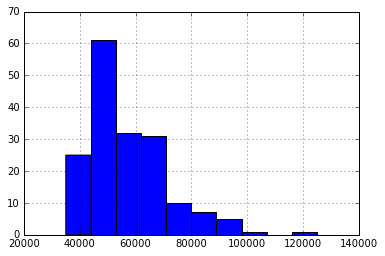

In [236]:
majors.Median.hist(bins = 10)

In [45]:
# 8. Plot a histogram of the distribution of median salaries by major category

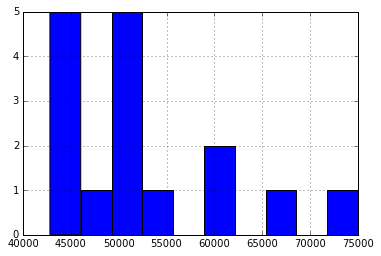

In [279]:
majors.groupby('Major_category').Median.median().hist(bins = 10)

In [46]:
# 9. What are the top 10 most UNemployed majors?

In [252]:
majors[['Major', 'Unemployed','Unemployment_rate']].sort_values(by = 'Unemployed', ascending = False).head(10)

,Major,Unemployed,Unemployment_rate
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261,0.058865
158,GENERAL BUSINESS,85626,0.051378
114,PSYCHOLOGY,79066,0.069667
159,ACCOUNTING,75379,0.053415
13,COMMUNICATIONS,54390,0.064360
73,ENGLISH LANGUAGE AND LITERATURE,52248,0.068645
164,MARKETING AND MARKETING RESEARCH,51839,0.055033
132,POLITICAL SCIENCE AND GOVERNMENT,40376,0.069374
25,GENERAL EDUCATION,38742,0.043904
78,BIOLOGY,36757,0.059301


In [47]:
# What are the unemployment rates?

In [250]:
majors[['Major', 'Unemployment_rate']].sort_values(by = 'Unemployment_rate', ascending = False).head(10)

,Major,Unemployment_rate
146,MISCELLANEOUS FINE ARTS,0.156147
116,CLINICAL PSYCHOLOGY,0.102712
93,MILITARY TECHNOLOGIES,0.101796
27,SCHOOL STUDENT COUNSELING,0.101746
77,LIBRARY SCIENCE,0.094843
141,VISUAL AND PERFORMING ARTS,0.094658
19,COMPUTER PROGRAMMING AND DATA PROCESSING,0.090264
119,SOCIAL PSYCHOLOGY,0.087336
104,ASTRONOMY AND ASTROPHYSICS,0.086022
11,ARCHITECTURE,0.085991


In [48]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

In [268]:
majors.groupby('Major_category').Unemployed.mean().sort_values(ascending = False).head(10)

Major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: Unemployed, dtype: float64

In [49]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

In [271]:
majors['sample_employment_rate'] = majors.Employed / majors.Total

In [272]:
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738


In [50]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"

In [273]:
majors['sample_unemployement_rate'] = 1 - majors.sample_employment_rate

In [274]:
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployement_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
